In [1]:
!uv pip install langgraph

Using Python 3.11.10 environment at: /home/ubu/Documents/work/l4t/langchain-langgraph-python/.venv
Audited 1 package in 1ms


In [2]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display
from typing import Literal

In [3]:
class State(TypedDict):
    input: str
    output: str
    isInputValid: bool

graph = StateGraph(State)

def analyse_string(state: State) -> State:
    input_str = state["input"]
    result = any(char.isdigit() for char in input_str)
    if result: 
        return {"isInputValid": False} 
    return {"isInputValid": True} 

def conditional_router(state: State) -> Literal["reverse_string", "display_failure"]:
    isValid = state["isInputValid"]
    if isValid:
        return "reverse_string"
    return "display_failure"

def reverse_string(state: State) -> State:
    result = state["input"][::-1]
    return {"output": result}

def display_output(state: State) -> None:
    print(f"Reversed input string is {state['output']}")

def display_failure(state: State) -> None:
    print(f"Input is invalid.")

# add nodes 
graph.add_node("analyse_string", analyse_string)
graph.add_node("reverse_string", reverse_string)
graph.add_node("display_output", display_output)
graph.add_node("display_failure", display_failure)

# add edges 
graph.add_edge(START, "analyse_string")
graph.add_conditional_edges("analyse_string", conditional_router)
graph.add_edge("reverse_string", "display_output")
graph.add_edge("display_output", END)
graph.add_edge("display_failure", END)

compiled_graph = graph.compile()

compiled_graph.invoke({"input": "Hey! I am original string."})

Reversed input string is .gnirts lanigiro ma I !yeH


{'input': 'Hey! I am original string.',
 'output': '.gnirts lanigiro ma I !yeH',
 'isInputValid': True}

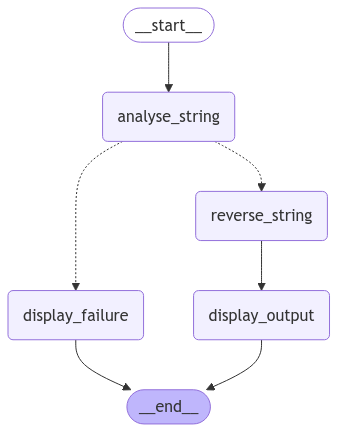

In [4]:

try:
    display(Image(compiled_graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass